In [1]:
import torch
import cv2
import pandas as pd
import numpy as np 
import os
import json
from ultralytics import YOLO, settings

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Prepare dataset


In [3]:
DATASET_ROOT_PATH = "./dataset/"
TRAIN_PATH = os.path.join(DATASET_ROOT_PATH, "train")
TEST_PATH = os.path.join(DATASET_ROOT_PATH, "test")

In [7]:
from dataset import TrainDataSet
from utils import build_csv, resizing_images

dataset_train_orig = os.path.join(TRAIN_PATH, "data_train")
build_csv(folder_path=dataset_train_orig, output_path=dataset_train_orig)



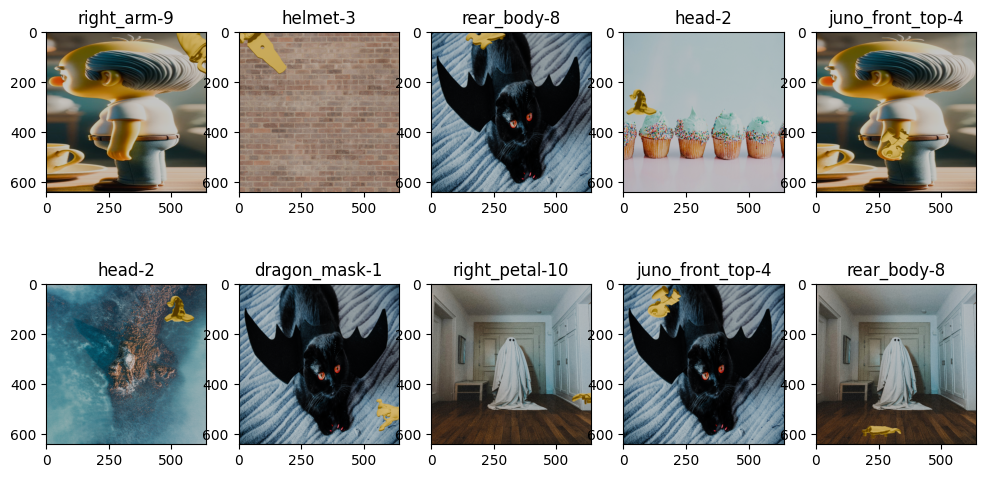

Num of classes:  11 
 They are:  ['base' 'dragon_mask' 'head' 'helmet' 'juno_front_top' 'left_base' 'main_body' 'parrot' 'rear_body' 'right_arm' 'right_petal']


In [16]:
entire_dataset = TrainDataSet(
        csv_file=os.path.join(dataset_train_orig, "resume_images.csv"), root_dir="", transform=None
    )
entire_dataset.show_dataset(10)
output = os.path.join(TRAIN_PATH, "./data4train")
entire_dataset.get_bounding_box(output_folder=output, val_split=0)

classes = entire_dataset.get_classes()

Train Yolo

In [12]:
def freeze_layer(trainer):
    model = trainer.model
    num_freeze = 10 
    print(f"Frezing {num_freeze} layers!")
    freeze = [f"model.{x}." for x in range(num_freeze)]
    for k, v in model.named_parameters():
        v.requires_grad = True
        if any(x in k for x in freeze):
            print(f"freezing {k}")
            v.requires_grad = False
    print(f"{num_freeze} freezed layer")


In [14]:
MODEL_ROOT_PATH = "./model"
# config_file = os.path.join(MODEL_ROOT_PATH, "config.json")

# with open(config_file) as f:
#     config = json.load(f)
    
# print("Hyperparams: ", config)

model = YOLO("yolov8m.pt")
model.to(device=device)
model.add_callback("on_train_start", freeze_layer)

model.train(data="./model/config.yaml", epochs=50, patience=10, imgsz=640, workers=8, optimizer="Adam", batch=4, lr0=0.001, lrf=0.01, fliplr=0.5, amp=False)

New https://pypi.org/project/ultralytics/8.2.37 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=./model/config.yaml, epochs=50, time=None, patience=10, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning C:\Users\lucaz\Desktop\AI study\pupptesFinder\dataset\train\data4train\labels\train.cache... 1342 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1342/1342 [00:00<?, ?it/s]
val: Scanning C:\Users\lucaz\Desktop\AI study\pupptesFinder\dataset\train\data4train\labels\val... 203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 203/203 [00:00<00:00, 252.22it/s]

val: New cache created: C:\Users\lucaz\Desktop\AI study\pupptesFinder\dataset\train\data4train\labels\val.cache


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Frezing 10 layers!
freezing model.0.conv.weight
freezing model.0.bn.weight
freezing model.0.bn.bias
freezing model.1.conv.weight
freezing model.1.bn.weight
freezing model.1.bn.bias
freezing model.2.cv1.conv.weight
freezing model.2.cv1.bn.weight
freezing model.2.cv1.bn.bias
freezing model.2.cv2.conv.weight
freezing model.2.cv2.bn.weight
freezing model.2.cv2.bn.bias
freezing model.2.m.0.cv1.conv.weight
freezing model.2.m.0.cv1.bn.weight
freezing model.2.m.0.cv1.bn.bias
freezing model.2.m.0.cv2.conv.weight
freezing model.2.m.0.cv2.bn.weight
freezing model.2.m.0.cv2.bn.bias
freezing model.2.m.1.cv1.conv.weight
freezing model.2.m.1.cv1.bn.weight
freezing model.2.m.1.cv1.bn.bias
freezing model.2.m.1.cv2.conv.weight
freezing model.2.m.1.cv2.bn.weight
freezing model.2.m.1.cv2.bn.bias
freezing model.3.conv.weight
f

       1/50      1.92G     0.8245      2.505      1.212          7        640:  82%|████████▏ | 274/336 [00:44<00:10,  6.16it/s]


KeyboardInterrupt: 

Test Yolo
